# Assignment : Recommendation Systems
    Domain : E-Commerce

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from collections import Counter
%matplotlib inline
import seaborn as sns
from surprise import Dataset 
from surprise import BaselineOnly
from surprise import KNNBaseline
from surprise import SVD
from surprise import accuracy
from collections import defaultdict
from surprise.model_selection import train_test_split
from surprise import Reader
from sklearn.model_selection import GridSearchCV

# Loading Dataset

In [2]:
df = pd.read_csv('../input/ratings-collaborative-filtering/ratings_Electronics.csv')

# Exploratory Data Analysis

    Looking at Head and Tail of Dataset

In [3]:
# Head of Dataset
df.head(10)

,AKM1MP6P0OYPR,0132793040,5.0,1365811200
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600
5,A3J3BRHTDRFJ2G,0511189877,2.0,1397433600
6,A2TY0BTJOTENPG,0511189877,5.0,1395878400
7,A34ATBPOK6HCHY,0511189877,5.0,1395532800
8,A89DO69P0XZ27,0511189877,5.0,1395446400
9,AZYNQZ94U6VDB,0511189877,5.0,1401321600


In [4]:
# Tail Of Dataset
df.tail(10)

,AKM1MP6P0OYPR,0132793040,5.0,1365811200
7824471,A5FUA9HEV2O42,BT008UKTMW,5.0,1405987200
7824472,A84WRQR47OOKR,BT008UKTMW,1.0,1401753600
7824473,A180UGKKYCPDH0,BT008UKTMW,5.0,1369353600
7824474,A2R6Q6KJCYSVH7,BT008UKTMW,3.0,1343520000
7824475,A2IGIIABRZ5LAB,BT008UKTMW,5.0,1356739200
7824476,A2YZI3C9MOHC0L,BT008UKTMW,5.0,1396569600
7824477,A322MDK0M89RHN,BT008UKTMW,5.0,1313366400
7824478,A1MH90R0ADMIK0,BT008UKTMW,4.0,1404172800
7824479,A10M2KEFPEQDHN,BT008UKTMW,4.0,1297555200
7824480,A2G81TMIOIDEQQ,BT008V9J9U,5.0,1312675200


In [5]:
# Shape Of the Dataset
df.shape

(7824481, 4)

    Hence, It is a hude DataSet with 7824481 rows and 4 columns

In [6]:
# Data Types within dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824481 entries, 0 to 7824480
Data columns (total 4 columns):
 #   Column         Dtype  
---  ------         -----  
 0   AKM1MP6P0OYPR  object 
 1   0132793040     object 
 2   5.0            float64
 3   1365811200     int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB


    Since, it is clear from the problem statement, the 1st column is user id, 2nd is movie id, 3rd is rating for the movie by the user and 4th is timestamp, these columns need to be added to the DataSet

# Data Pre-Processing

In [7]:
# Adding Columns to DataSet
df.columns = ['User_ID', 'Movie_ID', 'Rating', 'Timestamp']
df.head(10)

,User_ID,Movie_ID,Rating,Timestamp
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600
5,A3J3BRHTDRFJ2G,0511189877,2.0,1397433600
6,A2TY0BTJOTENPG,0511189877,5.0,1395878400
7,A34ATBPOK6HCHY,0511189877,5.0,1395532800
8,A89DO69P0XZ27,0511189877,5.0,1395446400
9,AZYNQZ94U6VDB,0511189877,5.0,1401321600


        Hence, the columns have been added to the DataSet

In [8]:
# Checking for Nan Values
df.isna().values.any()

False

     The DataSet does not have Nan values.

In [9]:
# Describing the dataset and looking at minimum, first quartile (Q1), median, third quartile (Q3), and maximum
# values.
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rating,7824481.0,4.012337e+00,1.380910e+00,1.0,3.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
Timestamp,7824481.0,1.338178e+09,6.900426e+07,912729600.0,1.315354e+09,1.361059e+09,1.386115e+09,1.406074e+09


     Since, there is only one numeric column that makes sense to have 5 point summary of i.e. the ratings column in readable form.
     Though the minimum timestamp in the DataSet points to year 1998 and the maximum timestamp points to 2014. Hence, the DataSet covers a timespan of 16 years for the ratings on the movies

In [10]:
# Checking for negative values in dataset
df['Rating'][df['Rating'] < 0].any()

False

    Hence, the dataset doesn't have negative values in it

In [11]:
# Checking for null values
df.isnull().values.any()

False

    The dataset has no Null values

In [12]:
dup_bool = df.duplicated(['User_ID','Movie_ID','Rating'])
print("Number of duplicate records:",sum(dup_bool))

Number of duplicate records: 0


# 1. Analysis

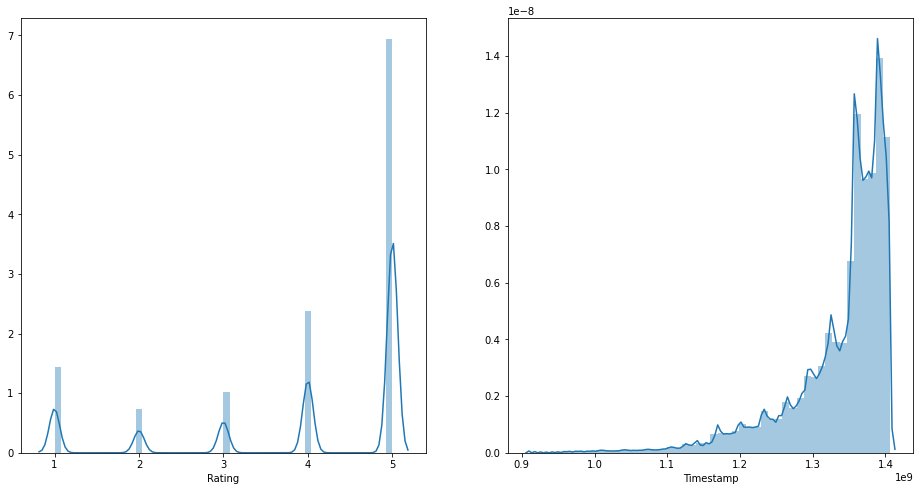

In [13]:
# Distribution Plots for Individual Features
fig, axes = plt.subplots(1,2,figsize=(16,8)) 
sns.distplot(df['Rating'],ax=axes[0])
sns.distplot(df['Timestamp'],ax=axes[1])

In [14]:
# Converting specific timestamps to date
timestamp1 = 1300000000
dt_object1 = datetime.fromtimestamp(timestamp1)


timestamp2 = 1400000000
dt_object2 = datetime.fromtimestamp(timestamp2)

print("Timestamp 1 =", dt_object1)
print("Timestamp 2 =", dt_object2)

Timestamp 1 = 2011-03-13 07:06:40
Timestamp 2 = 2014-05-13 16:53:20


    From the above graphs:
        1. Most of the ratings given by the users are 5 for the movies.
        
        2. And most of the ratings are between years 2011 and 2014. Hence, the graph is right skewed for the Timestamp

# 2. Taking Subset of the DataSet

In [15]:
# Unique Movies in the DataSet
df_movies = Counter(df.Movie_ID)

In [16]:
# Keep movies with occurences grater than 70
df_movies_selected = []
for i in df_movies:
  if df_movies[i] > 70:
    df_movies_selected.append(i)

In [17]:
df_new = df
df_new = df_new[df_new['Movie_ID'].isin(df_movies_selected)]
df_new.shape

(4932191, 4)

In [18]:
# Unique Users in the DataSet
df_users = Counter(df.User_ID)

In [19]:
# Keep users with occurences grater than 5
df_users_selected = []
for j in df_users:
  if df_users[j] > 5:
    df_users_selected.append(j)

In [20]:
df_new = df
df_new = df_new[df_new['User_ID'].isin(df_users_selected)]
df_new.shape

(1904153, 4)

  Hence the size of DataSet has been reduced to 1904153 rows

# 3. Popularity Recommender Model

In [21]:
# Creating new Columns
df_new['date'] = pd.to_datetime(df_new['Timestamp'], unit='s')
df_new['Year'] = df_new['date'].dt.year
df_new.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,User_ID,Movie_ID,Rating,Timestamp,date,Year
5,A3J3BRHTDRFJ2G,0511189877,2.0,1397433600,2014-04-14,2014
12,AO94DHGC771SJ,0528881469,5.0,1370131200,2013-06-02,2013
13,AMO214LNFCEI4,0528881469,1.0,1290643200,2010-11-25,2010
15,A3N7T0DY83Y4IG,0528881469,3.0,1283990400,2010-09-09,2010
16,A1H8PY3QHMQQA0,0528881469,2.0,1290556800,2010-11-24,2010


In [22]:
# Taking Ratings in the last Year, so as to recommend movies which have been popular in last 1 Year
dfByYear = df_new[df_new['Year'] > 2013]
dfByYear.shape

(384978, 6)

In [23]:
popular_movies = pd.DataFrame(round(dfByYear.groupby('Movie_ID')['Rating'].mean(),0))
popular_movies['Count'] = pd.DataFrame(dfByYear.groupby('Movie_ID')['Rating'].count())

In [28]:
# Listing the Top Five Popular Movies since Past 1 Year
popular_movies.sort_values(ascending=False, by=['Rating','Count']).head(10)

,Rating,Count
Movie_ID,,
B007WTAJTO,5.0,1614
B003ES5ZUU,5.0,1171
B00E3W15P0,5.0,912
B00GTGETFG,5.0,636
B002V88HFE,5.0,626
B00E055H5O,5.0,593
B005FYNSPK,5.0,530
B0019EHU8G,5.0,484
B006W8U2MU,5.0,443


    Hence, shown above are the top 10 movies based on popularity.

# 4. Splitting Data into Training and Testing

In [31]:
df_colab = df_new

In [32]:
# Getting DataSet Ready for train and test split
reader = Reader()
ratings = Dataset.load_from_df(df_colab[['User_ID', 'Movie_ID', 'Rating']], reader)

In [33]:
# Splitting the DataSet with 30% Test and 70% Train Data
trainSet, testSet = train_test_split(ratings, test_size=.30, random_state = 10)
print("Size of trainset: ", trainSet.n_ratings)
print("Size of testset: ", len(testSet))

Size of trainset:  1332907
Size of testset:  571246


# 5. Collaborative Filtering Model

In [34]:
# Using SVD from surprise to fit over the ratings DataSet with User based Collaborative Filtering model
svd = SVD(verbose=False)
svd.fit(trainSet)

# 6. Making Predictions and Scoring the Errors

In [35]:
# Making Predictions And Calculation RMSE for the model
train_predictions = svd.test(trainSet.build_testset())
test_predictions = svd.test(testSet)
print("RMSE on training data : ", accuracy.rmse(train_predictions,verbose = False))
print("RMSE on test data: ", accuracy.rmse(test_predictions,verbose = False))

RMSE on training data :  0.7762009338426898
RMSE on test data:  1.1283243443468387


In [36]:
# Function to build Predictions DataFrame Column for Number of ItemsRatedByUser
def get_Iu(uid):
    """
        args: 
        uid: the id of the user
        returns:
        the number of items rated by the user
    """
    try:
        return len(trainSet.ur[trainSet.to_inner_uid(uid)])
    except ValueError: # user was not part of the trainset
        return 0

# Function to build Predictions DataFrame Column for Number of UsersRatedThisItem
def get_Ui(iid):
    """
        args:
        iid: the raw id of the item
        returns:
        the number of users that have rated the item.
    """
    try:
       return len(trainSet.ir[trainSet.to_inner_iid(iid)])
    except ValueError:
       return 0

In [37]:
# Creating Predictions DataFrame

df_predictions = pd.DataFrame(test_predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])
df_predictions['ItmesRatedByUser'] = df_predictions.uid.apply(get_Iu)
df_predictions['UsersRatedThisItem'] = df_predictions.iid.apply(get_Ui)
df_predictions['err'] = abs(df_predictions.est - df_predictions.rui)

In [38]:
# Getting 10 Best Predictions By the Model

best_predictions = df_predictions.sort_values(by='err')[:10]
best_predictions

,uid,iid,rui,est,details,ItmesRatedByUser,UsersRatedThisItem,err
370264,A95E1Q84GZNJH,B004286VMW,5.0,5.0,{'was_impossible': False},7,293,0.0
542273,A29WAMDRBA65I1,B008LTBIGW,5.0,5.0,{'was_impossible': False},11,22,0.0
20437,AX5H09FQDGYWB,B005LJQPE0,5.0,5.0,{'was_impossible': False},5,62,0.0
306729,A2XKRTDDV4JCRN,B001TH7T2U,5.0,5.0,{'was_impossible': False},7,512,0.0
347020,A3U4X6OWJO7PMB,B001TH7GSW,5.0,5.0,{'was_impossible': False},6,718,0.0
20433,A35PE6GS966EPN,B0058UUR6E,5.0,5.0,{'was_impossible': False},14,604,0.0
84209,A3D4K392PMYJKZ,B004DEKH84,5.0,5.0,{'was_impossible': False},17,35,0.0
368021,AGJHZ41VBGK51,B0014Z5XMK,5.0,5.0,{'was_impossible': False},25,45,0.0
212515,ATA4YSJ4JCBTR,B009NB8WR0,5.0,5.0,{'was_impossible': False},18,427,0.0
564230,A1MYXK6EEPB35P,B004G6002M,5.0,5.0,{'was_impossible': False},7,913,0.0


In [39]:
# Getting 10 Worst Predictions by the Model

worst_predictions = df_predictions.sort_values(by='err')[-10:]
worst_predictions

,uid,iid,rui,est,details,ItmesRatedByUser,UsersRatedThisItem,err
38801,A30N0AZMP71OO1,B005T63BEM,1.0,5.0,{'was_impossible': False},8,33,4.0
115376,A3BOCSJRO5P6LG,B0044YU60M,1.0,5.0,{'was_impossible': False},6,668,4.0
479144,ATZFZONPLXQJN,B003MAZY6A,1.0,5.0,{'was_impossible': False},10,18,4.0
462642,A3MPHJMEIAWSCR,B001TH7GVE,1.0,5.0,{'was_impossible': False},6,265,4.0
509779,A1CITHAQ9R2GSS,B0043T7FXE,1.0,5.0,{'was_impossible': False},4,690,4.0
210369,A1K7D97LFTX9O9,B00829THK0,1.0,5.0,{'was_impossible': False},7,487,4.0
156926,ASQQ1D42IHBQ0,B00EF1OGOG,1.0,5.0,{'was_impossible': False},3,170,4.0
245326,A3VBC0KXTZJGLK,B0009PAYY8,1.0,5.0,{'was_impossible': False},12,33,4.0
403318,A2SKUEKNQLMSZP,B0024R4B5C,1.0,5.0,{'was_impossible': False},8,296,4.0
99927,A35DV63KM73JI,B005LDLP8W,1.0,5.0,{'was_impossible': False},6,149,4.0


# 7. Recommending Top k=5 movies for the user

    From ther above Dataframe, it seems threshold value of 3 would be optimum to use

In [40]:
# Mapping and Sorting movies with each user

def get_all_predictions(predictions):
    
    # First map the predictions to each user.
    top_n = defaultdict(list)    
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))
    # Then sort the predictions for each user
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
    return top_n
all_pred = get_all_predictions(test_predictions)

In [41]:
selected_pred = defaultdict(list) 
for i in all_pred.items():
    if len(i[1]) >= 5:
        selected_pred[i[0]] = i[1]

In [42]:
# Mapping top 5 movies with each user

k = 5
for uid, user_ratings in selected_pred.items():
    user_ratings.sort(key=lambda x: x[1], reverse=True)
    selected_pred[uid] = user_ratings[:k]
    
tmp = pd.DataFrame.from_dict(selected_pred)
tmp_transpose = tmp.transpose()

In [43]:
# Function to return recommended movies for a user

def get_predictions(user_id):
    results = tmp_transpose.loc[user_id]
    return results

In [44]:
# Get Movie recommendations for a User

user_id = 'A12GKGLR2L4MZY'
movies = get_predictions(user_id)
movies

0                     (B002V88HFE, 5)
1      (B002BH3Z8E, 4.73558250992906)
2     (B00109Y2DQ, 4.704400823561847)
3    (B0013T1Z7O, 4.6301456003401755)
4     (B0011NVMO8, 4.628307256427266)
Name: A12GKGLR2L4MZY, dtype: object

    Hence, the recommendations for any user can be retrieved by passing the User ID in the above function

# 8. Insights and Findings

    The DataSet contained a huge number of records i.e. more than 78 lakh ratings given by the Users.
    I tried to reduce the DataSet in two ways:
        1. Only kept records for movies with number times ratings given more than 70
        2. Only kept records with number of times ratings given by a user more than 5
        
    Then, to build a Popularity Based Recommender, I used the TimeStamp Column too and got the current trending movies by keeping only the ratings in the past year. This way, a new user is recommended the movies currently being watched by the other users. Similar to what is being done by Netflix these days.

    Then, I built a Collaborative Filtering Model to recommend the top 5 movies to the user based on the ratings given by the user and other user's with the help of SVD Algorithm. There are other algorithms too, such as KNNWithMeans and KNNBasline but, those algorithms with such a large DataSet were crashin the system and I wanted to build a Model without losing much data.
    
    I also calculated the Root Mean Squared Error (RMSE) for the Model built using SVD and printed out the Top 10 correct predictions and Bottom 10 predictions.
    
    Hence, at last, I built a function which provides top 5 recommendations for the user.